# <font color='#2a7bbd'>Introduction</font> 

Named after Johanes Kepler, the Kepler space observatory was build by NASA in 2009. Its primary purpose was to discover earth like planets in orbiting the stars. This would include planets beyond our solar system, exoplanets. In the 9 years and 7 months it has operated, Kepler has observed 530,506 stars and detected 2,662 planets.

source: https://en.wikipedia.org/wiki/Kepler_space_telescope



## <font color='#6605a2'>The Dataset</font> 

The Dataset comes from <a href="https://www.kaggle.com/nasa/kepler-exoplanet-search-results">Kaggle.</a> The original dataset has 50 features and aproximately over 9,000 observations. The kaggle dataset was published in 2017. The original dataset was published by NASA and can also be accessed through Caltech's website   <a href="https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi
">here</a>

Additional information regarding the features description can be accessed here <a href="https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html">here</a>

The following prominent features from this dataset are the following:

__kepoi_name:__ A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis
<br>
__kepler_name:__ [These names] are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.
<br>
__koi_disposition:__ The disposition in the literature towards this exoplanet candidate. One of CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.
<br>
__koi_pdisposition:__ The disposition Kepler data analysis has towards this exoplanet candidate. One of FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.
<br>
__koi_score:__ A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.

source: https://www.kaggle.com/nasa/kepler-exoplanet-search-results

Lastly, we will defire what __koi__ means which will be seen throughout the Dataset.
<br>
__koi__ - Kepler Object of Interest

First we will import the neccessary libraries and assign the csv dataset into a DataFrame of its own.

In [1]:
#importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics, preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

from scipy.cluster.hierarchy import dendrogram, linkage

import umap
import scipy

import warnings
warnings.filterwarnings(action='ignore')

kepler_df = pd.read_csv('keppler.csv', index_col = 0)

print(kepler_df.info())
kepler_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 1 to 9564
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2294 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Our first analysis of thie dataset contains several missing values, strings and features which will not be neccessary. We will first proceed by looking at the missing values.

### <font color='#e39113'>Missing Values and Feature Engineering</font> 

Our next approach is to deal with the missing values and analyze the dataset features. We will get a summpay percentage of the entire dataset.

In [2]:
#Getting the percentage of missing values.
kepler_df.isna().sum() * 100 / len(kepler_df)

kepid                  0.000000
kepoi_name             0.000000
kepler_name           76.014220
koi_disposition        0.000000
koi_pdisposition       0.000000
koi_score             15.788373
koi_fpflag_nt          0.000000
koi_fpflag_ss          0.000000
koi_fpflag_co          0.000000
koi_fpflag_ec          0.000000
koi_period             0.000000
koi_period_err1        4.746968
koi_period_err2        4.746968
koi_time0bk            0.000000
koi_time0bk_err1       4.746968
koi_time0bk_err2       4.746968
koi_impact             3.795483
koi_impact_err1        4.746968
koi_impact_err2        4.746968
koi_duration           0.000000
koi_duration_err1      4.746968
koi_duration_err2      4.746968
koi_depth              3.795483
koi_depth_err1         4.746968
koi_depth_err2         4.746968
koi_prad               3.795483
koi_prad_err1          3.795483
koi_prad_err2          3.795483
koi_teq                3.795483
koi_teq_err1         100.000000
koi_teq_err2         100.000000
koi_inso

We see a lot of missing values, including features which are empty. We will need to drop these features including string based features.

Before we proceedm, we will draw a heatmap to represent the missing values. This will be a visual representation to confirm our initial assumption.

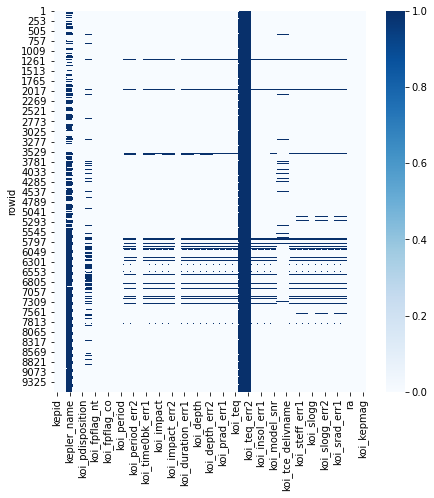

In [3]:
plt.figure(figsize=(7,7))
sns.heatmap(kepler_df.isna(),cmap='Blues' )
plt.show()

The following markdown cells will contain the process or dealing with missing values and dropping columns which will not be neccessary.

The 2 features have 100% missing values so we will drop them.

In [4]:
#Dropping 2 features from the Dataset
kepler_df.drop(columns=['koi_teq_err1','koi_teq_err2'], inplace=True)

The following features will 'id' will be dropped since they are only identifying features which will not make any differences in the Dataset.

In [5]:
#Dropping string and 'id' features from the dataset.
kepler_df.drop(columns=['kepid','kepler_name','kepoi_name', 'koi_tce_delivname'], inplace=True)

In [6]:
#Dropping the single missing value in 'koi_kepmag'
kepler_df.dropna(subset=['koi_kepmag'], inplace=True)

Before filling the missing values, we want to further process 2 features that are categorical. We will first get their value counts in order to identify what value the categories belongs to. These 2 string features does not have any missing values, thus we will not process them for missing values.

In [7]:
kepler_df['koi_disposition'].value_counts()

FALSE POSITIVE    5022
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [8]:
kepler_df['koi_pdisposition'].value_counts()

FALSE POSITIVE    5067
CANDIDATE         4496
Name: koi_pdisposition, dtype: int64

We will now label encode these 2 features in order to use their categorical features as numeric. We will also print the classes to indetify each of the categories. This will also help when performing the models at a later time

In [9]:
le = preprocessing.LabelEncoder()
kepler_df['koi_disposition'] = le.fit_transform(kepler_df['koi_disposition'])
print(le.classes_)
kepler_df['koi_pdisposition'] = le.fit_transform(kepler_df['koi_pdisposition'])
print(le.classes_)

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']
['CANDIDATE' 'FALSE POSITIVE']


We believe that the best approach on __filling in the missing featues will be with the mean__. Though we will fill this with the mean, it will also need further processing. Taking into account that some of the error feature comes in pairs and the percentage of missing values are exactly the same.

Example: 

koi_prad_err1          3.795483
<br>
koi_prad_err2          3.795483


We fill the missing values with the mean per column.

In [10]:
#Filling na values with the mean
for col in kepler_df.columns:
    kepler_df[col].fillna(kepler_df[col].mean(),inplace=True)    

The summary below now tells us that we have completely filled any missing falues in our dataframe. We will verify this by also producing a heatmap in the next cell.

In [11]:
kepler_df.isna().sum() * 100 / len(kepler_df)

koi_disposition      0.0
koi_pdisposition     0.0
koi_score            0.0
koi_fpflag_nt        0.0
koi_fpflag_ss        0.0
koi_fpflag_co        0.0
koi_fpflag_ec        0.0
koi_period           0.0
koi_period_err1      0.0
koi_period_err2      0.0
koi_time0bk          0.0
koi_time0bk_err1     0.0
koi_time0bk_err2     0.0
koi_impact           0.0
koi_impact_err1      0.0
koi_impact_err2      0.0
koi_duration         0.0
koi_duration_err1    0.0
koi_duration_err2    0.0
koi_depth            0.0
koi_depth_err1       0.0
koi_depth_err2       0.0
koi_prad             0.0
koi_prad_err1        0.0
koi_prad_err2        0.0
koi_teq              0.0
koi_insol            0.0
koi_insol_err1       0.0
koi_insol_err2       0.0
koi_model_snr        0.0
koi_tce_plnt_num     0.0
koi_steff            0.0
koi_steff_err1       0.0
koi_steff_err2       0.0
koi_slogg            0.0
koi_slogg_err1       0.0
koi_slogg_err2       0.0
koi_srad             0.0
koi_srad_err1        0.0
koi_srad_err2        0.0


The next heatmap will will confirm that we have processed all missing values.

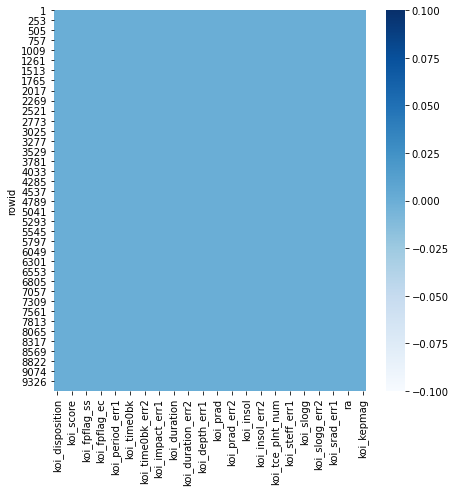

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(kepler_df.isna(),cmap='Blues' )
plt.show()

### <font color='#e39113'>Further Feature Engineering</font> 

In this section, we will look at the Dataset's features and figure out ways to better represent this data. We eill also try to convert some features into more useful ones and remove features if it may not be of any use.

First, We will sepatate the error features from those that does not have that feature

In [13]:
kepler_noerr_df = kepler_df.columns[~kepler_df.columns.str.contains(r'.*_err[0-9]')]
kepler_noerr_df

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

We will also separate the features which as an error in the label.

In [14]:
kepler_err_df = kepler_df.columns[kepler_df.columns.str.contains(r'.*_err[0-9]')]
kepler_err_df

Index(['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1',
       'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'],
      dtype='object')

In order to minimize the columns, we will now get the mean of 2 error features and place that into a new feature column. After creating the new column with the mean, we will then drop the 2 feature columns with an error label. These feature containg the mean will be assigned to a new column in the DataFrame.

In [15]:
#koi period error
kepler_df['koi_period_err'] = (kepler_df['koi_period_err1'] + kepler_df['koi_period_err2']) /2
#koi time0bk_error
kepler_df['koi_time0bk_err'] = (kepler_df['koi_time0bk_err1'] + kepler_df['koi_time0bk_err2']) /2
#koi impact_error
kepler_df['koi_impact_err'] = (kepler_df['koi_impact_err1'] + kepler_df['koi_impact_err2']) /2
#koi duration error
kepler_df['koi_duration_err'] = (kepler_df['koi_duration_err1'] + kepler_df['koi_duration_err2']) /2
#koi depth error
kepler_df['koi_depth_err'] = (kepler_df['koi_depth_err1'] + kepler_df['koi_depth_err1']) /2
#koi prad error
kepler_df['koi_prad_err'] = (kepler_df['koi_prad_err1'] + kepler_df['koi_prad_err2']) /2
#koi insol error
kepler_df['koi_insol_err'] = (kepler_df['koi_insol_err1'] + kepler_df['koi_insol_err2']) /2
#koi steff error
kepler_df['koi_steff_err'] = (kepler_df['koi_steff_err1'] + kepler_df['koi_steff_err1']) /2
#koi slog error
kepler_df['koi_slogg_err'] = (kepler_df['koi_slogg_err1'] + kepler_df['koi_slogg_err2']) /2
#koi srad error
kepler_df['koi_srad_err'] = (kepler_df['koi_srad_err1'] + kepler_df['koi_srad_err2']) /2


kepler_df.drop(columns=['koi_period_err1','koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1',
                       'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1','koi_depth_err2', 
                        'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1','koi_insol_err2', 'koi_steff_err1', 
                        'koi_steff_err2', 'koi_slogg_err1','koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], inplace=True)

kepler_df.shape

(9563, 33)

We have now reduced our number of features from 50 to 33. This will also help in dimensionality reduction and avoid any multicoliearity which may occur.

### <font color='#e39113'>Outliers</font> 

In this section we will begin looking for outliers and limit the outliers as to prevent any bias or skewed data.

In [16]:
#Investigate the columns
kepler_df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag',
       'koi_period_err', 'koi_time0bk_err', 'koi_impact_err',
       'koi_duration_err', 'koi_depth_err', 'koi_prad_err', 'koi_insol_err',
       'koi_steff_err', 'koi_slogg_err', 'koi_srad_err'],
      dtype='object')

We will randomly select 4 features and take a look if there are any outliers which exists in the data. From this random features, we will plot them in order to visually observe any outliers.

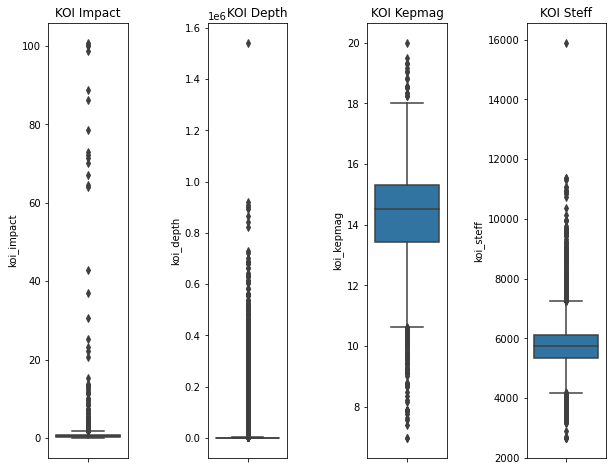

In [17]:
#selecting 4 features to identify any outliers.
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=1)

plt.subplot(1,4,1)
sns.boxplot(kepler_df['koi_impact'], orient='v')
plt.title('KOI Impact')

plt.subplot(1,4,2)
sns.boxplot(kepler_df['koi_depth'],orient='v')
plt.title('KOI Depth', loc='right')

plt.subplot(1,4,3)
sns.boxplot(kepler_df['koi_kepmag'],orient='v')
plt.title('KOI Kepmag')

plt.subplot(1,4,4)
sns.boxplot(kepler_df['koi_steff'],orient='v')
plt.title('KOI Steff')

plt.show()

As we can see from the randomly selected features plotted in the boxplots above, there are several identifiable outliers. We will now proceed with dealing with these outliers by keeping the quantile range between the beginning 1% and the ending 99%. This method will be applied to the entire dataframe containing numberical values in their features. 

We will also re-plot the same features in oder to view the differences in outliers.

In [18]:
#capping the features from 1% to 99% of avaolable features.
def limit(kepler_df):
    for col in kepler_df.columns:
        print("cap the feature: {}".format(col))
        if (((kepler_df[col].dtype)=='float64') | ((kepler_df[col].dtype)=='int64')):
            percentiles = kepler_df[col].quantile([0.01,0.99]).values
            kepler_df[col][kepler_df[col] <= percentiles[0]] = percentiles[0]
            kepler_df[col][kepler_df[col] >= percentiles[1]] = percentiles[1]
        else:
            kepler_df[col]=kepler_df[col]
    return kepler_df

#reassigning the capped feature back to the original dataframe.
kepler_df = limit(kepler_df)

cap the feature: koi_disposition
cap the feature: koi_pdisposition
cap the feature: koi_score
cap the feature: koi_fpflag_nt
cap the feature: koi_fpflag_ss
cap the feature: koi_fpflag_co
cap the feature: koi_fpflag_ec
cap the feature: koi_period
cap the feature: koi_time0bk
cap the feature: koi_impact
cap the feature: koi_duration
cap the feature: koi_depth
cap the feature: koi_prad
cap the feature: koi_teq
cap the feature: koi_insol
cap the feature: koi_model_snr
cap the feature: koi_tce_plnt_num
cap the feature: koi_steff
cap the feature: koi_slogg
cap the feature: koi_srad
cap the feature: ra
cap the feature: dec
cap the feature: koi_kepmag
cap the feature: koi_period_err
cap the feature: koi_time0bk_err
cap the feature: koi_impact_err
cap the feature: koi_duration_err
cap the feature: koi_depth_err
cap the feature: koi_prad_err
cap the feature: koi_insol_err
cap the feature: koi_steff_err
cap the feature: koi_slogg_err
cap the feature: koi_srad_err


After running the function above and again re-assigning it to the dataframe, we will re-plot the randomly selected features and look if there are any differences in outliers.

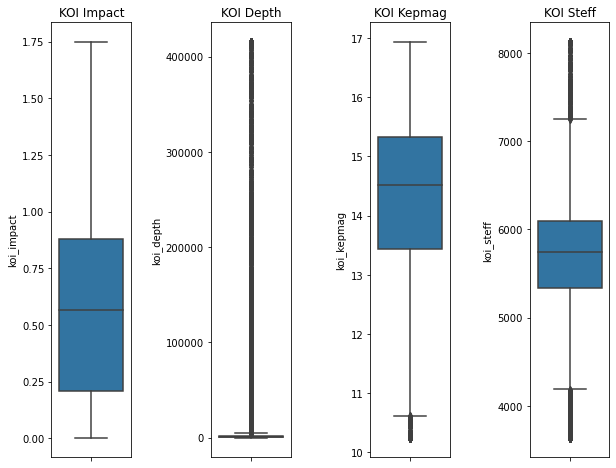

In [19]:
#replotting in order to compare changes in outliers.
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=1)

plt.subplot(1,4,1)
sns.boxplot(kepler_df['koi_impact'], orient='v')
plt.title('KOI Impact')

plt.subplot(1,4,2)
sns.boxplot(kepler_df['koi_depth'],orient='v')
plt.title('KOI Depth')

plt.subplot(1,4,3)
sns.boxplot(kepler_df['koi_kepmag'],orient='v')
plt.title('KOI Kepmag')

plt.subplot(1,4,4)
sns.boxplot(kepler_df['koi_steff'],orient='v')
plt.title('KOI Steff')

plt.show()

As we can see with our observations from the plot above, the outliers were substantially decreased. We will then proceed with out Explaratory Data Analysis and look at the data further.

### <font color='#e39113'>Exploratory Data Analysis</font> 

First, we will be looking at be looking at the features we will be working with, calling the columns will show us this. We called the columns again in this section to make it easier for us to view what are available.

In [20]:
kepler_df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag',
       'koi_period_err', 'koi_time0bk_err', 'koi_impact_err',
       'koi_duration_err', 'koi_depth_err', 'koi_prad_err', 'koi_insol_err',
       'koi_steff_err', 'koi_slogg_err', 'koi_srad_err'],
      dtype='object')

We can also see after applying a few feature engineering methods earlier, we are now able to reduce the dimensions from 51 to 33. We have only dropped one row which still gives us the remaining 9,563 observations to run our obeservations and models with.

In [21]:
kepler_df.shape

(9563, 33)

Nest, we look at the description of the dataset to see if any information stads out and to just view any insights the data may have.

In [22]:
kepler_df.describe()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,...,koi_period_err,koi_time0bk_err,koi_impact_err,koi_duration_err,koi_depth_err,koi_prad_err,koi_insol_err,koi_steff_err,koi_slogg_err,koi_srad_err
count,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,...,9563.0,9563.0,9563.000000,9563.0,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000
mean,1.290076,0.529855,0.480889,0.188225,0.231517,0.194918,0.120046,60.876467,165.469399,0.572118,...,0.0,0.0,0.809073,0.0,65.023769,-0.253070,162.087079,144.014201,-0.011240,0.005301
std,0.822282,0.499134,0.437653,0.390913,0.421824,0.396158,0.325032,119.497101,63.210009,0.402222,...,0.0,0.0,4.368947,0.0,132.774777,3.256904,759.793882,42.272861,0.063454,0.176374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.527676,131.526785,0.003000,...,0.0,0.0,-0.345314,0.0,1.762000,-18.378200,-2459.701700,55.000000,-0.134000,-1.065960
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.734571,132.762000,0.209050,...,0.0,0.0,-0.142500,0.0,10.100000,-0.015000,0.267500,108.000000,-0.057000,-0.009000
50%,2.000000,1.000000,0.480889,0.000000,0.000000,0.000000,0.000000,9.753740,137.228540,0.566000,...,0.0,0.0,0.001500,0.0,22.300000,0.045000,6.830000,155.000000,-0.011211,0.024000
75%,2.000000,1.000000,0.995000,0.000000,0.000000,0.000000,0.000000,40.715305,170.694999,0.877000,...,0.0,0.0,0.158475,0.0,59.050000,0.230000,68.922500,173.000000,0.012500,0.082500
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,551.001492,448.534260,1.747190,...,0.0,0.0,33.138360,0.0,961.140000,8.957000,5095.431200,246.000000,0.232190,0.376640


The next step will be looking for any correlation and try to resolve and anything with a significant or strong colienarity. Additionally, we need to look at the features which can be positivey and negetively correlated. 'Just not significantly.

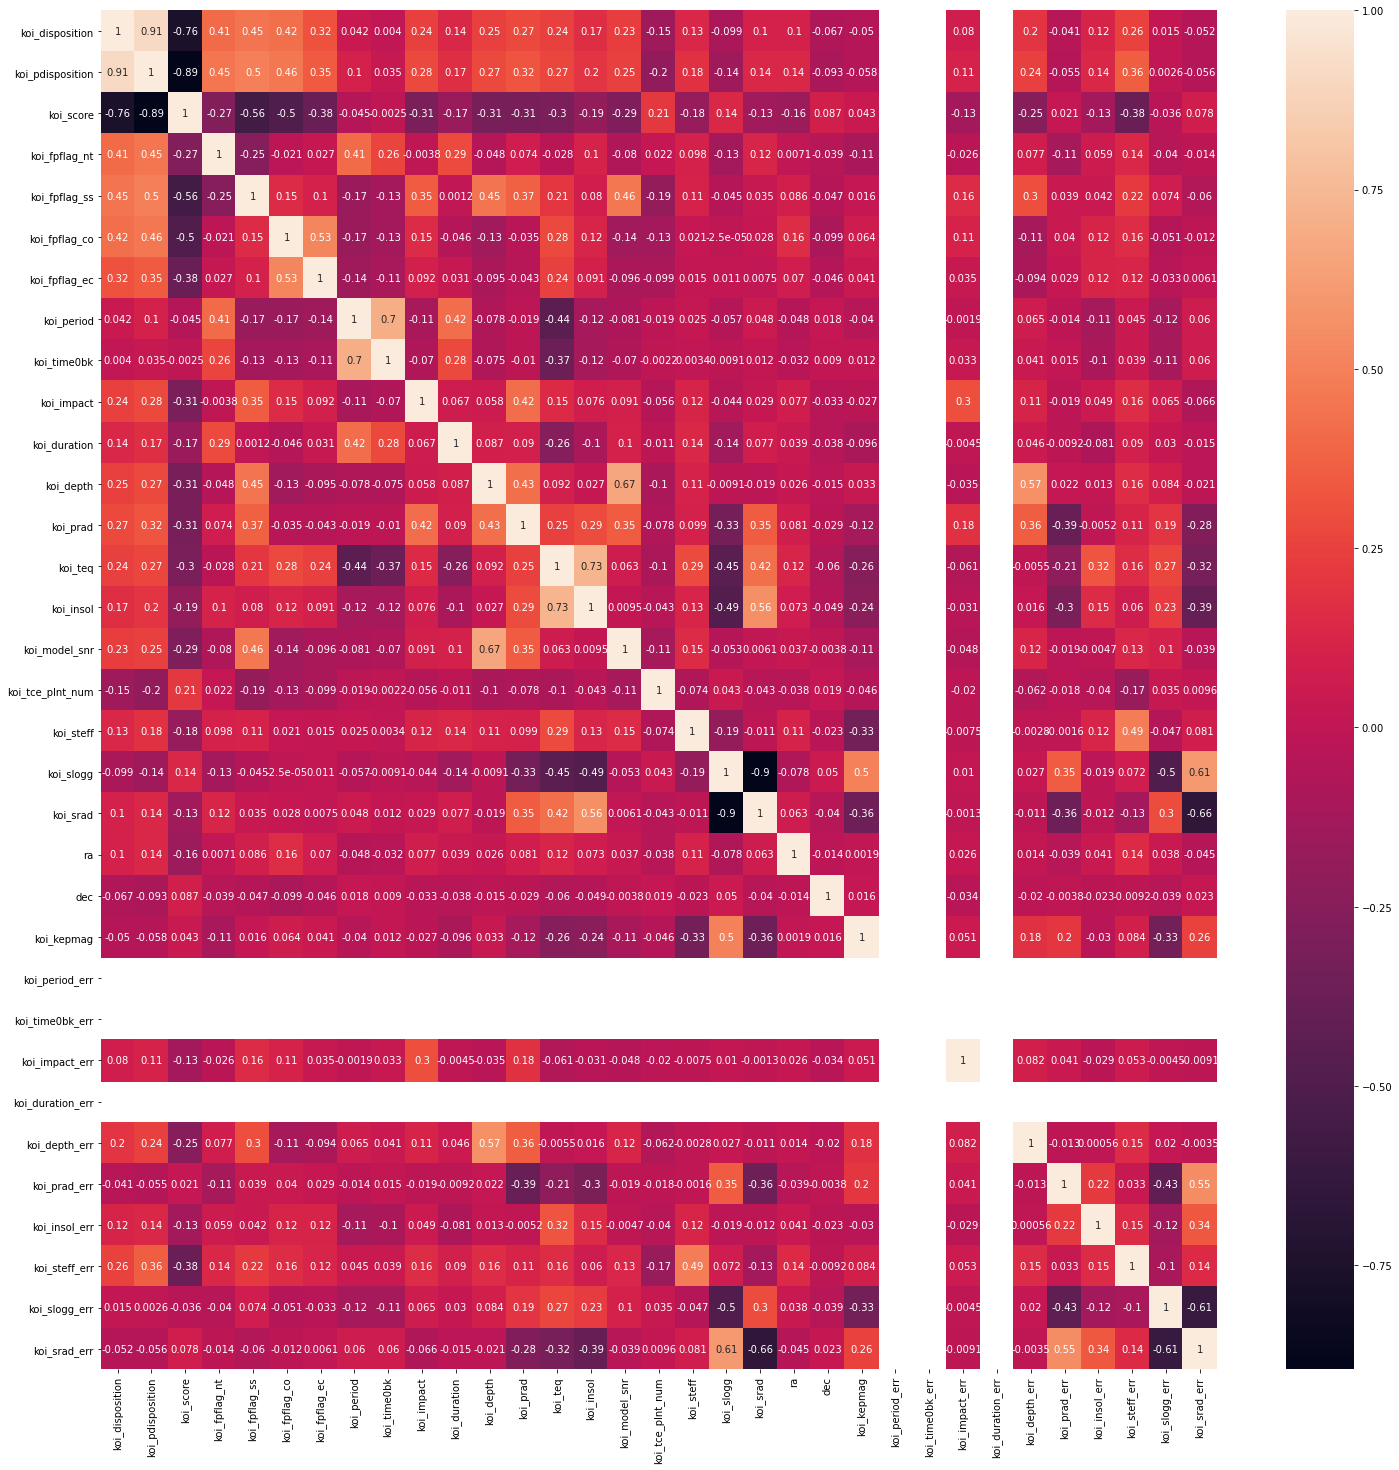

In [23]:
#plotting the correlation plot amongst numerical features.
plt.figure(figsize=(25,25))
sns.heatmap(kepler_df.corr(), annot=True)
plt.show()

Our first correlation observation with the use of a heatmap shows 3 features with a too strong correlation with all other features. This can be seen in the plotted hearmap by the white bars running accross. This also seems to be occuring in 3 features. If not removed, this may be an issue as we move forward. We will then drop these features before proceeding.

In [24]:
#Dropping the 3 features which are too identical with the entire dataframe.
kepler_df.drop(columns=['koi_period_err', 'koi_time0bk_err', 'koi_duration_err'], axis=0, inplace=True)

We will not re-plot the correlation map in order to verify that those 3 columns are no longer available to us.

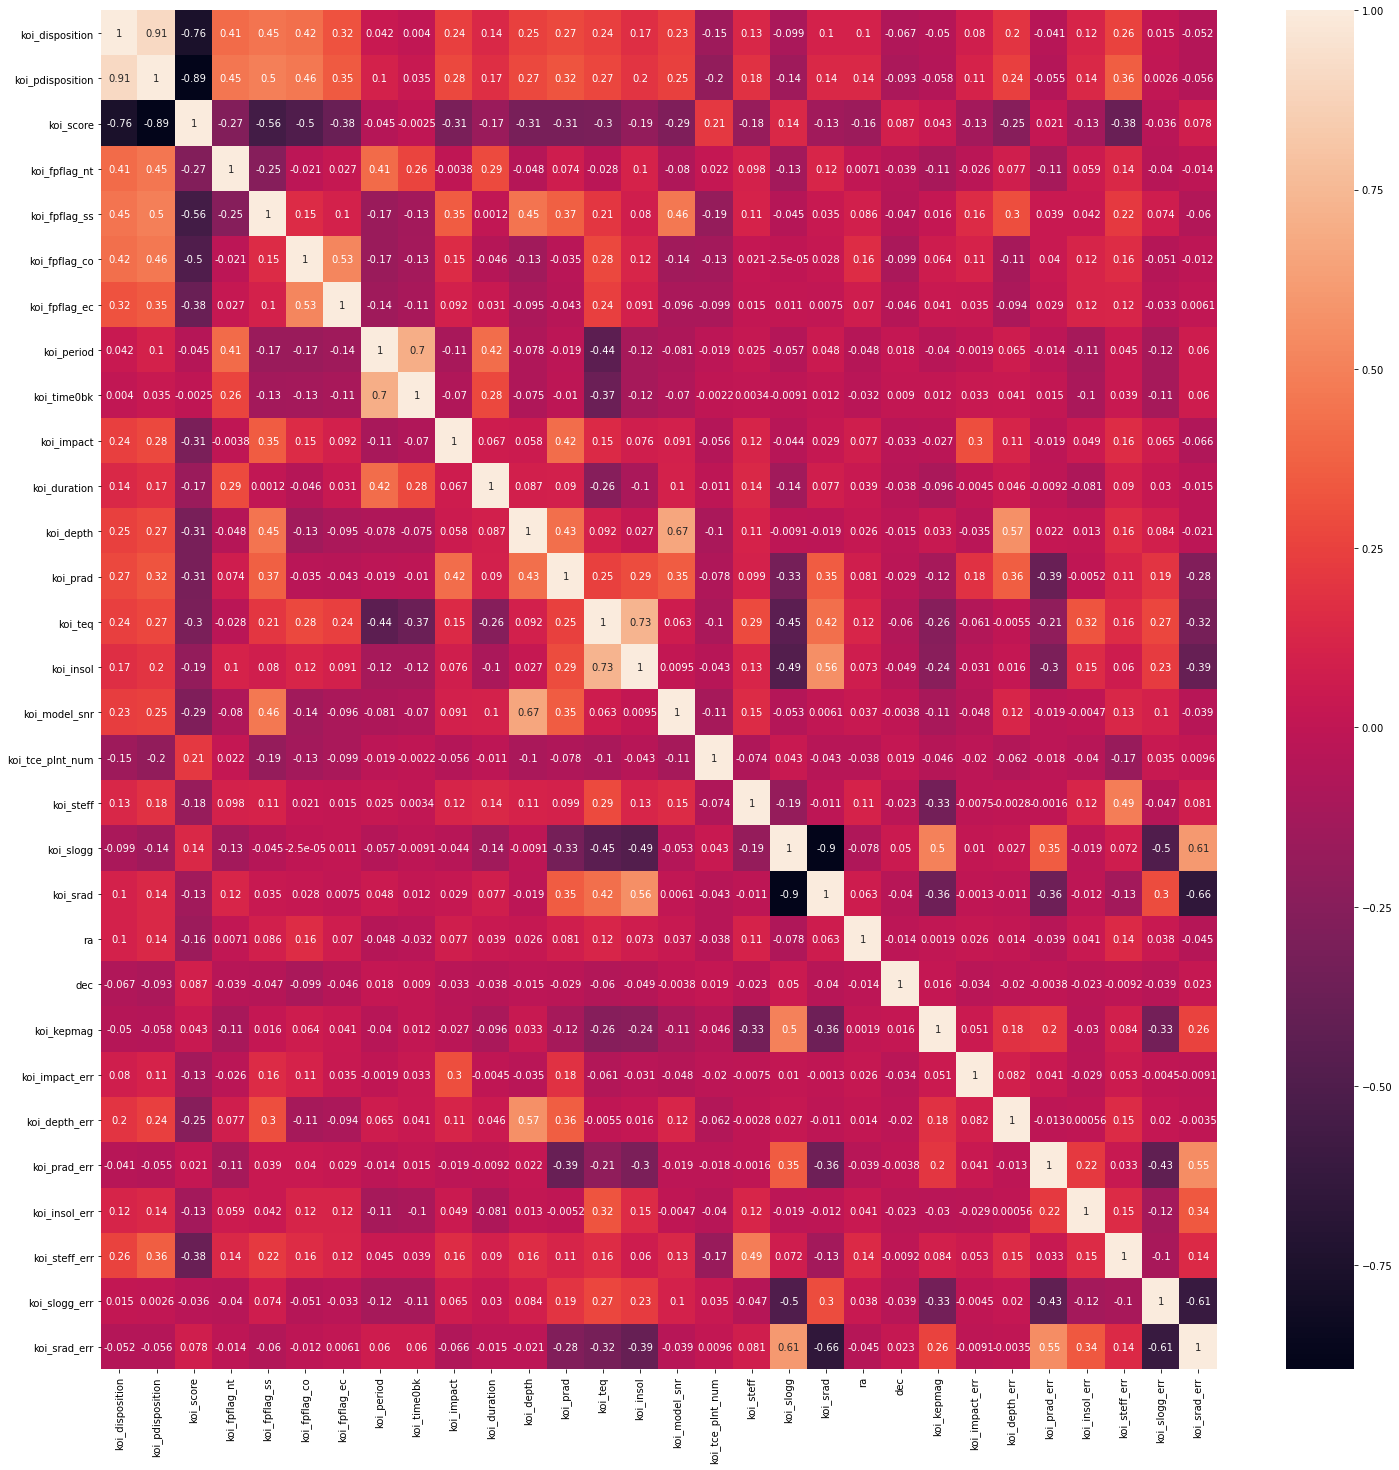

In [25]:
plt.figure(figsize=(25,25))
sns.heatmap(kepler_df.corr(), annot=True)
plt.show()

As observed in the plot above, we have now removed the 3 features which has full correlation with the rest of the dataframe.

Next, we will look for any distinct or unique values from the features.

In [26]:
for cols in kepler_df:
    unique = np.unique(kepler_df[cols])
    nr = len(unique)
    if nr < 10:
        print('The number of values for feature {} :{} --  which are {}'.format(cols, nr, unique))
    else:
        print('The number of values for feature {} :{}'.format(cols, nr))

The number of values for feature koi_disposition :3 --  which are [0 1 2]
The number of values for feature koi_pdisposition :2 --  which are [0 1]
The number of values for feature koi_score :651
The number of values for feature koi_fpflag_nt :2 --  which are [0 1]
The number of values for feature koi_fpflag_ss :2 --  which are [0 1]
The number of values for feature koi_fpflag_co :2 --  which are [0 1]
The number of values for feature koi_fpflag_ec :2 --  which are [0 1]
The number of values for feature koi_period :9373
The number of values for feature koi_time0bk :9347
The number of values for feature koi_impact :2305
The number of values for feature koi_duration :7652
The number of values for feature koi_depth :6779
The number of values for feature koi_prad :2867
The number of values for feature koi_teq :2363
The number of values for feature koi_insol :7676
The number of values for feature koi_model_snr :2610
The number of values for feature koi_tce_plnt_num :5 --  which are [1.      

Our first plot will be plotting the koi disposition features. These are categorical features which identify if 'confirmed','false positive' or a 'candidate exoplanet.

#### Plotting the diposition and pdisposition unique features

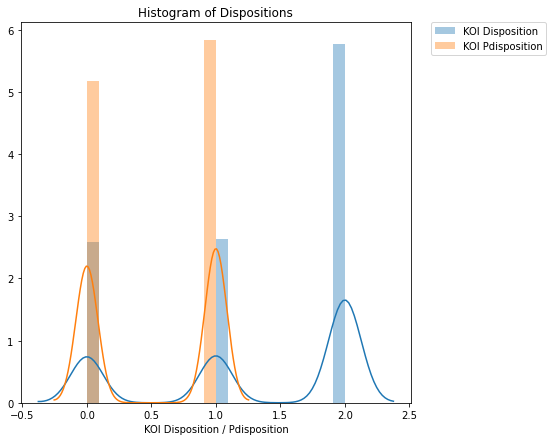

In [27]:
plt.figure(figsize=(7,7))
sns.distplot(kepler_df['koi_disposition'])
sns.distplot(kepler_df['koi_pdisposition'])
plt.title('Histogram of Dispositions')
plt.xlabel('KOI Disposition / Pdisposition')
plt.legend(labels=['KOI Disposition', 'KOI Pdisposition'], bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0.)
plt.show()

The histogram plot above shows ua a 'KOI Disposition' with a significant number of 'False Positive' exoplanets discovered. 'Confirmed' and 'Candidate' exoplanets appear to be close with each other.

The 'KOI Pdisposition' also shows us that there are less candidates than there are 'False Positive' planets identified.

#### Plotting the depth and impact.

The KOI Depth indicats the Stellar Flux Lost
<br>
The KOI Impact indicates the Distance between 2 stellar discs.

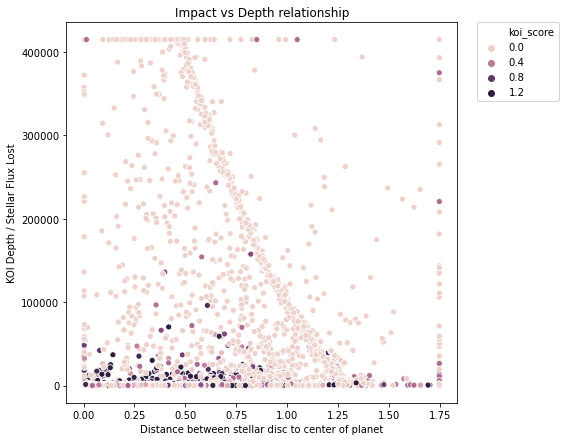

In [28]:
plt.figure(figsize=(7,7))
sns.scatterplot(data= kepler_df, y='koi_depth', x='koi_impact', hue='koi_score',ci=95)
plt.title('Impact vs Depth relationship')
plt.ylabel('KOI Depth / Stellar Flux Lost')
plt.xlabel('Distance between stellar disc to center of planet')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We see in the scatter plot above the relationship between the 'KOI Impact' and 'KOI Depth'. The likelihood that the object will be a confirmed exoplanet would need a lower 'KOI Depth' and a 'KOI Impact' from 0 to .75. These are where most of the confirmed 'koi scores' are gathered around.

#### Creating a Pairplot among prominent features.

Next, we will create a pairplot which will show the relationships between some of the more prominent features in the Dataset.  The features in this pairplot will consist of 'koi_period', 'koi_impact', 'koi_duration' and the 'koi_depth'. We can see the replationships among each one of them.

<Figure size 504x504 with 0 Axes>

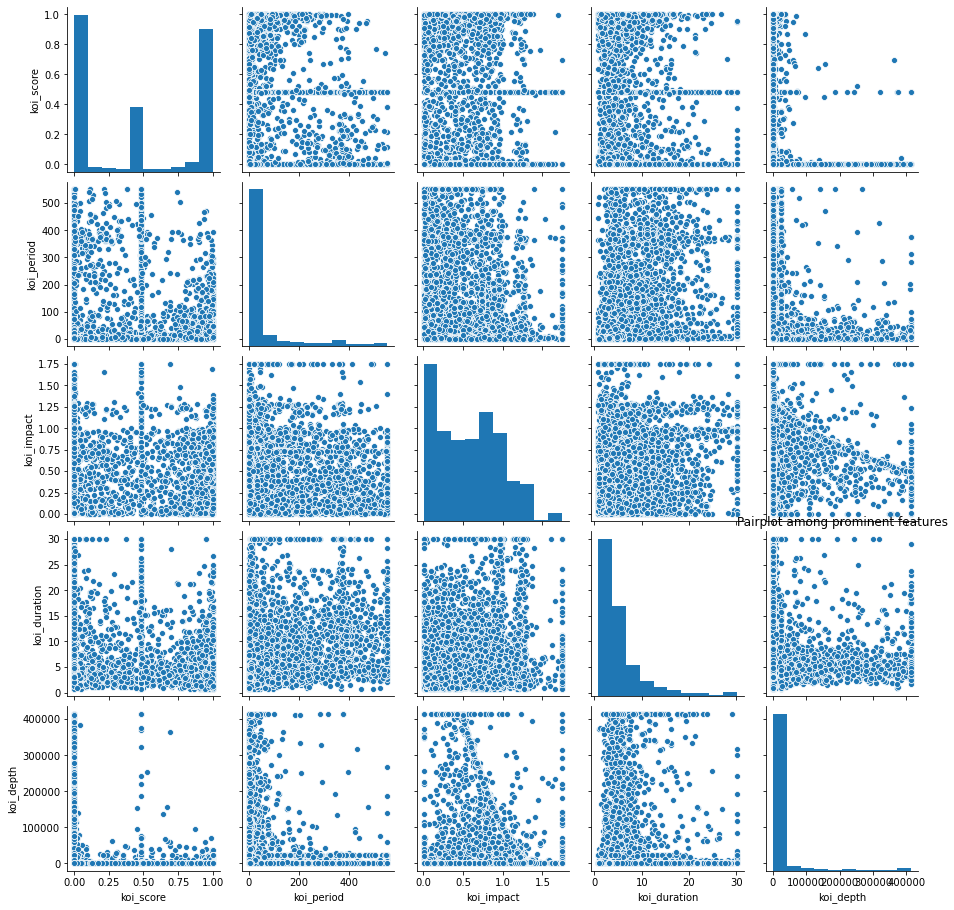

In [29]:
sns_df = kepler_df[['koi_score','koi_period', 'koi_impact','koi_duration', 'koi_depth']]

plt.figure(figsize=(7,7))
sns.pairplot(data=sns_df)
plt.title('Pairplot among prominent features')
plt.show()

#### Plotting koi_kepmag from the koi_slogg

Next, we create a scatterplot to visualize the relationship among the koi_slogg and koi_kepmag

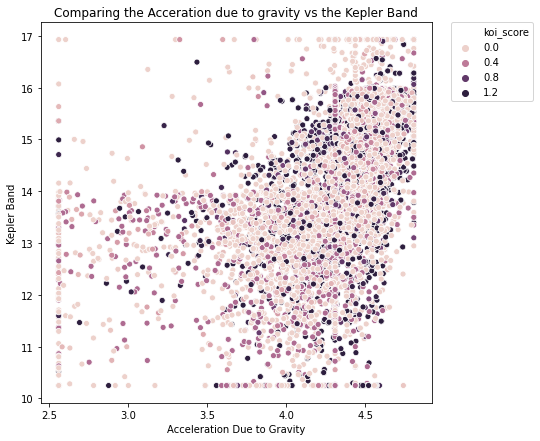

In [30]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=kepler_df, x='koi_slogg', y='koi_kepmag', hue='koi_score')
plt.title('Comparing the Acceration due to gravity vs the Kepler Band')
plt.ylabel('Kepler Band')
plt.xlabel('Acceleration Due to Gravity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()

We all see in the plot above that there are different variables which could effect the discovery of exoplanets. Some confimed exoplanets cluster together and some are just found scattered randomly. The kepler band (kepmag) and the slogg (acceleration due to gravity) does not neccessary have any foundation in having a score which can be identified as a new exoplanet.

#### Plotting the assumed Temprature of the planet.

We are also plotting the assumed temperature of a planet. The planets temperature can also give us a high indication if it is potential exoplanet. Certain temperature generates water which is a an even stronger indication of a habitable planet.

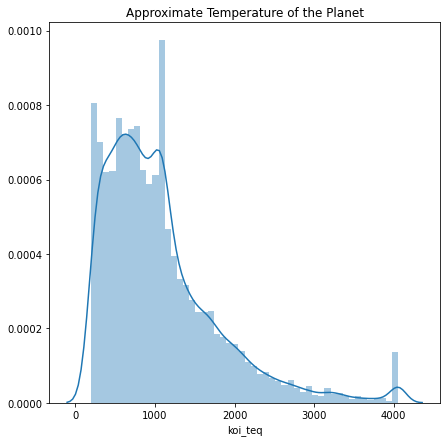

In [31]:
plt.figure(figsize=(7,7))
sns.distplot(kepler_df['koi_teq'])
plt.title('Approximate Temperature of the Planet')
plt.show()

The approximate temperature of the planet is also shown in the plot above. Though not normalized, we will used some model in a later section which should normalize this.

#### Categorical plot between the koi_steff and koi_disposition

The plot will identify and categorize andy potential exoplanet based on their presumed temperature.

<Figure size 720x720 with 0 Axes>

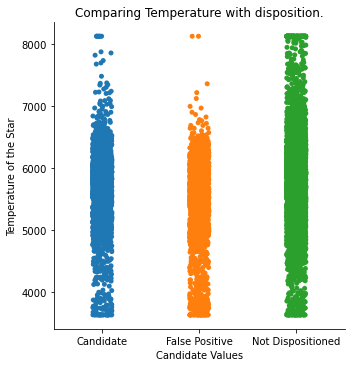

In [32]:
#categorical plot
plt.figure(figsize=(10,10))
sns.catplot(data=kepler_df, y='koi_steff', x='koi_disposition')
plt.title('Comparing Temperature with disposition.')
plt.xlabel('Candidate Values')
plt.ylabel('Temperature of the Star')
plt.xticks([0,1,2], ['Candidate', 'False Positive', 'Not Dispositioned'])
plt.show()

#### Ploting Duration and Depth 

This next categorical plot shows us the likelyhood a planet will be given the assumed temperature of the star.

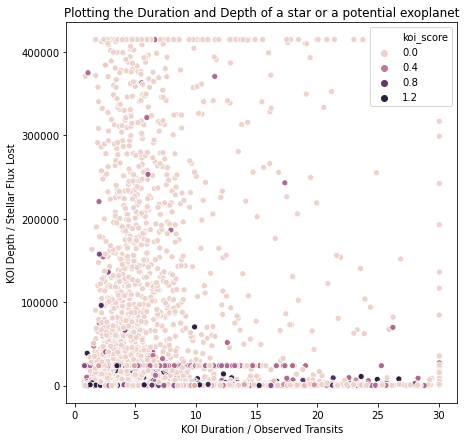

In [33]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=kepler_df, x='koi_duration', y='koi_depth', hue='koi_score')
plt.title('Plotting the Duration and Depth of a star or a potential exoplanet')
plt.xlabel('KOI Duration / Observed Transits')
plt.ylabel('KOI Depth / Stellar Flux Lost')
plt.show()

### <font color='#e39113'>Scaling</font> 

We will now transform the data using standard scaler method. This turns the mean to 0 and the standard deviation to 1.

In [34]:
#performing the standard scaler
scaler = StandardScaler().fit(kepler_df)
x_scaled = scaler.transform(kepler_df)

In [35]:
#getting the shape of the scaled dataset.
x_scaled.shape

(9563, 30)

### <font color='#e39113'>PCA</font> 

We will perform PCA in order to reduce dimensionality. This will be performed and plotted to view the data visually and check for any clustering which could have occured.

We will be plotting the data using 2, 5, 10 and 15 dimentions.

First we view the scaled data.

In [36]:
x_scaled

array([[-0.35278823, -1.0616034 ,  1.18618522, ..., -1.49073176,
        -0.0750163 ,  0.09468191],
       [-0.35278823, -1.0616034 ,  1.11534922, ..., -1.49073176,
        -0.0750163 ,  0.09468191],
       [ 0.86340278,  0.94197136, -1.09884721, ...,  0.33086312,
        -0.86303413,  0.40937079],
       ...,
       [-1.56897924, -1.0616034 ,  0.03681391, ...,  0.49646265,
        -1.14672055,  0.61349331],
       [ 0.86340278,  0.94197136, -1.05086153, ...,  1.15886079,
        -1.14672055,  0.61349331],
       [ 0.86340278,  0.94197136, -1.09884721, ...,  0.33086312,
        -1.09943948,  0.74390492]])

#### Plotting the Data with PCA using 2, 5, 10 and 20 dimentions.

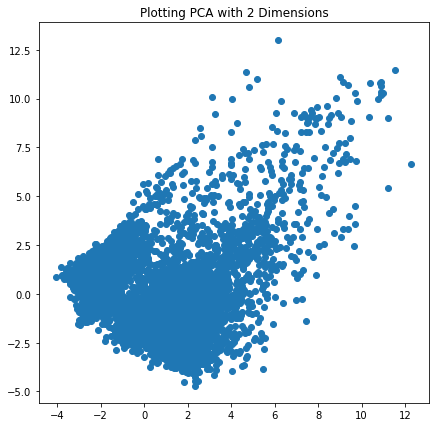

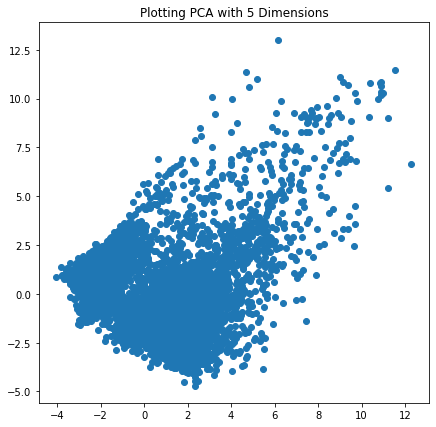

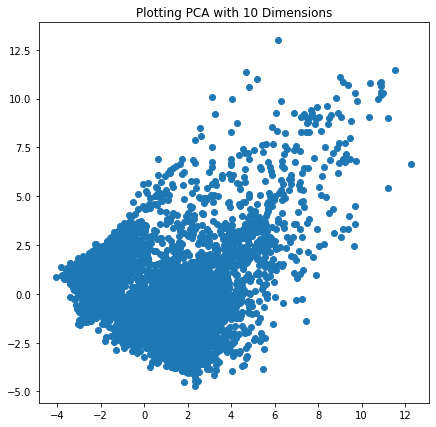

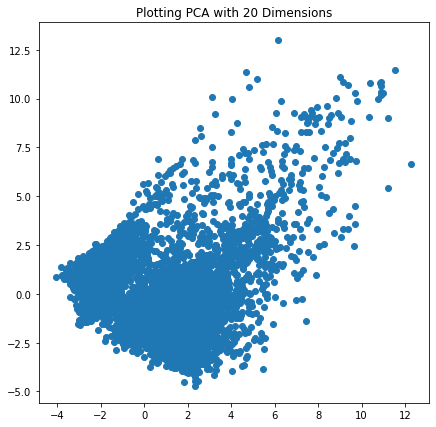

In [37]:
#Using 2,5,10,20 dimentions to plot 3 different plots
for k in [2,5,10,20]:
    pca = PCA(n_components=k, random_state=100).fit(x_scaled)
    x_pca = pca.transform(x_scaled)
    
    plt.figure(figsize=(7,7))
    plt.scatter(x_pca[:,0],x_pca[:,1])
    plt.title('Plotting PCA with {} Dimensions'.format(k))
    plt.show()

With the 4 different plots of K covering 2, 5, 10 and 20,  there is still no clear difference between the plots. We will return to these plots at a later time after running the models to see if there was any differences produced.

### <font color='#e39113'>UMAP</font> 

We will now try the another dimensionality reduction technique, which is UMAP. Like the previous plots, we will run a loop to create several plots which have 2, 5, 10 and 15 dimensions. After plotting, we will oobserve to see if there is a difference from that of a PCA plot.

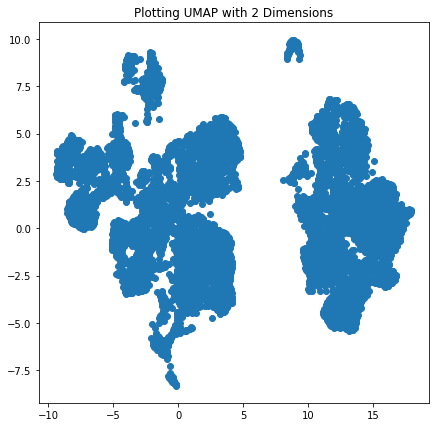

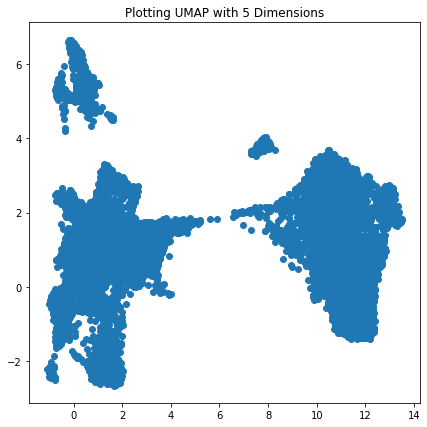

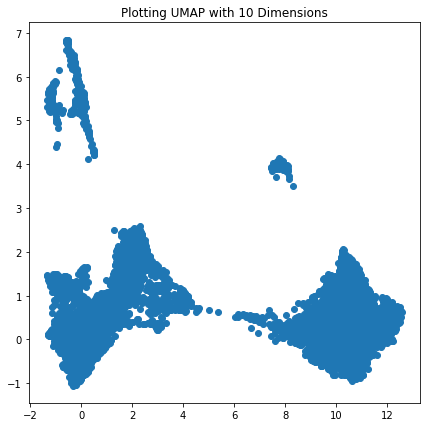

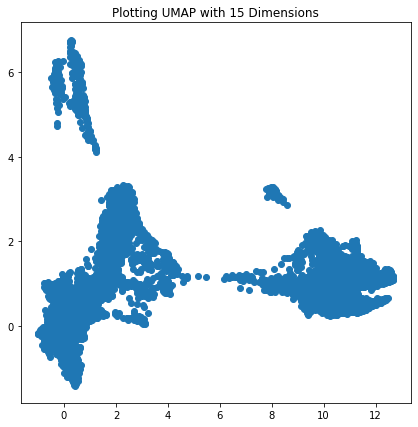

In [38]:
for k in [2,5,10,15]:
    umap_results = umap.UMAP(n_components=k, min_dist=.5, random_state=100).fit_transform(x_scaled)
    
    plt.figure(figsize=(7,7))
    plt.scatter(umap_results[:,0],umap_results[:,1])
    plt.title('Plotting UMAP with {} Dimensions'.format(k))
    plt.show()

After running 2, 5, 10 and 15 dimensions, the clustering in the plot is getting clearer as we can see a few clusters forming. 

### <font color='#e39113'>Model Selection</font> 

In this section we will try different models and apply this unsupervised machine learning method to cluster the dataset so similarities will be grouped together. We will be using KMeans, DBSCAN, Heirarichal and GMM.

#### KMeans Clustering

In [39]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

Kmeans - The first model we will try to cluster the data is the KMeans algorithm. Before proceeding, we would also want to look at the elbow to determing what the best number of clusters would be.

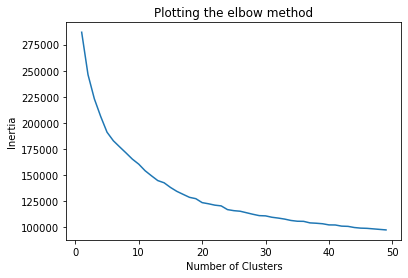

In [40]:
inertia = []
for k in range(1, 50):
    inertia.append(KMeans(n_clusters=k, max_iter=1000).fit(x_scaled).inertia_)

sns.lineplot(range(1,50), inertia)
plt.title('Plotting the elbow method')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.show()

Based on the elbow elbow plot, we will be using 2 n_clusters to proceed with our models. We will be using 5 and 15.
The first kmeans model we will be using is 5.

#### KMeans with 5 Clusters

We will now create a KMeans model with 5 clusters.

In [41]:
#creating Kmeans model with 5 clusters
kmeans_5 = KMeans(n_clusters=5)
kmeans_clusters_5 = kmeans_5.fit_predict(x_scaled)

In [42]:
#assign the cluster to a feature in the dataframe
kepler_df['kmeans_clusters_5'] = kmeans_clusters_5

In [43]:
#counting the values for each cluster   
kepler_df.kmeans_clusters_5.value_counts()    

4    4236
3    2457
1    1422
2     963
0     485
Name: kmeans_clusters_5, dtype: int64

Creating a countplot to initially visualize the different clusters that are grouped together.

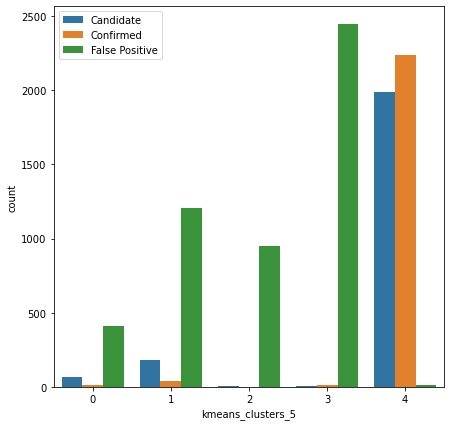

In [44]:
labels = ['Candidate', 'Confirmed', 'False Positive']

plt.figure(figsize=(7,7))
sns.countplot(data=kepler_df, x='kmeans_clusters_5', hue='koi_disposition')
plt.legend(labels)
plt.show()

Plotting with PCA to reduce dimensions to 2.

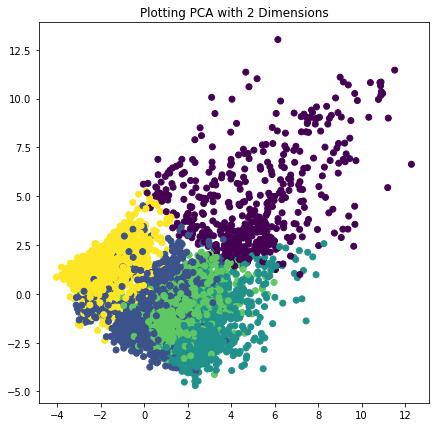

In [45]:
plt.figure(figsize=(7,7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kepler_df.kmeans_clusters_5)
plt.title('Plotting PCA with 2 Dimensions')
plt.show()

Plotting with UMAP and reducing dimensions to 2


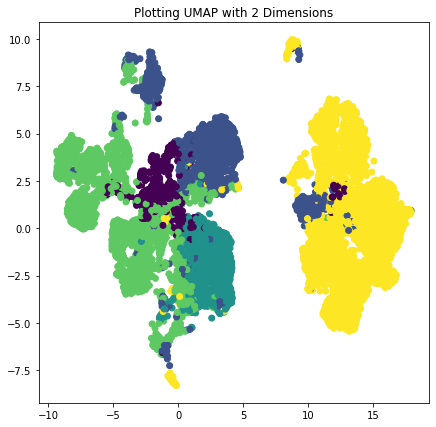

In [46]:
umap_results_2 = umap.UMAP(n_components=2, min_dist=.5, random_state=100).fit_transform(x_scaled)

plt.figure(figsize=(7,7))
plt.scatter(umap_results_2[:,0],umap_results_2[:,1], c=kepler_df.kmeans_clusters_5)
plt.title('Plotting UMAP with {} Dimensions'.format(2))
plt.show()

We will now get the Silhoutte score. We will gather all the scores at the end and also compare them to each other.

In [47]:
print('The clusters are the ff: {}'.format(kmeans_5.labels_))
print('The inertia is: {}'.format(kmeans_5.inertia_))
print('The Silhouette score for KMeans of 5 is: {}'
      .format(metrics.silhouette_score(x_scaled, kmeans_clusters_5, metric='euclidean')))

The clusters are the ff: [4 4 3 ... 4 3 3]
The inertia is: 190948.20309277228
The Silhouette score for KMeans of 15 is: 0.21126864698555156


#### KMeans 15

Now we will create our second KMeans model using 15 clusters.

In [48]:
#creating Kmeans model with 15 clusters
kmeans_15 = KMeans(n_clusters=15)
kmeans_clusters_15 = kmeans_15.fit_predict(x_scaled)

In [49]:
#assign the cluster to a feature in the dataframe
kepler_df['kmeans_clusters_15'] = kmeans_clusters_15

In [50]:
#counting the values for each cluster   
kepler_df.kmeans_clusters_15.value_counts()   

1     1441
11    1313
13    1223
0     1083
5      973
4      821
12     679
2      466
8      396
3      303
6      245
10     199
9      179
7      142
14     100
Name: kmeans_clusters_15, dtype: int64

We will also create a contplot to initially visualize the different clusters created by the model.

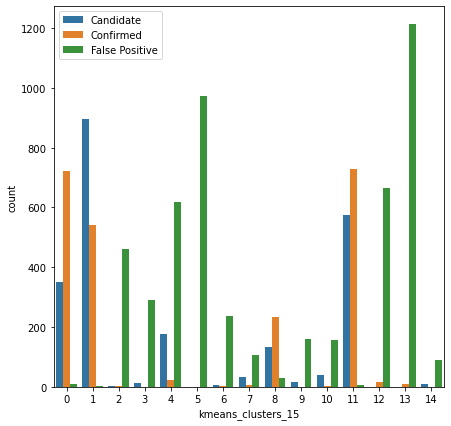

In [51]:
labels = ['Candidate', 'Confirmed', 'False Positive']

plt.figure(figsize=(7,7))
sns.countplot(data=kepler_df, x='kmeans_clusters_15', hue='koi_disposition')
plt.legend(labels)
plt.show()

Next, we will also visualize the model by reducing dimensions to 2 using PCA.

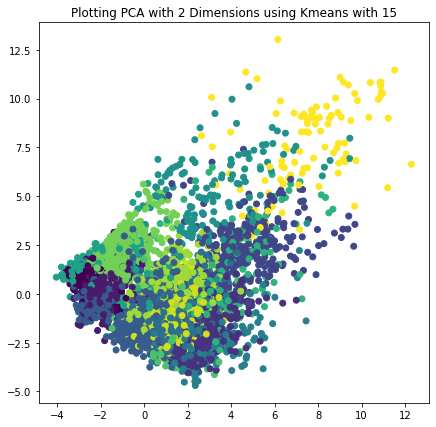

In [52]:
# Plot the solution.
plt.figure(figsize=(7,7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kepler_df.kmeans_clusters_15)
plt.title('Plotting PCA with 2 Dimensions using Kmeans with 15')
plt.show()

The plot above still shows similarity in shape as withe the PCA model plotted previously with differences in colors of some clusters. There still is no clear identification of clusters.

We will also visualize the model using another dimensionality reduction method called UMAP. For this plotm we will also be using 2 dimensions to keep it standard with the rest of the models.

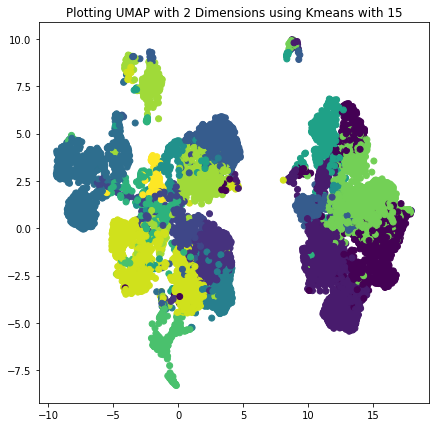

In [53]:
umap_results_2 = umap.UMAP(n_components=2, min_dist=.5, random_state=100).fit_transform(x_scaled)

plt.figure(figsize=(7,7))
plt.scatter(umap_results_2[:,0],umap_results_2[:,1], c=kepler_df.kmeans_clusters_15)
plt.title('Plotting UMAP with 2 Dimensions using Kmeans with 15')
plt.show()

Lastly, we will get our Silhouette score with other metrics.

In [54]:
print('The clusters are the ff: {}'.format(kmeans_15.labels_))
print('The inertia is: {}'.format(kmeans_15.inertia_))
print('The Silhouette score for KMEANS with 15 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, kmeans_clusters_15, metric='euclidean')))

The clusters are the ff: [ 0  0 13 ...  1 13  5]
The inertia is: 137596.3377234706
The Silhouette score for KMEANS with 15 clusters is: 0.12859434534628264


#### DBSCAN 5

Our next model will be a DBSCAN model. This model does not require a cluster to be specified, but instead we will be using an epison to measure the distances. For this DBSCAN model we will be using an epsilon value of 5 and 7.

In [55]:
dbscan_5 = DBSCAN(eps=5, min_samples=10).fit_predict(x_scaled)

In [56]:
kepler_df['dbscan_5'] = dbscan_5

In [57]:
kepler_df.dbscan_5.value_counts()  

 0    9265
-1     260
 1      27
 2      11
Name: dbscan_5, dtype: int64

We will now create a countplot to visualize any clustering that has taken place.

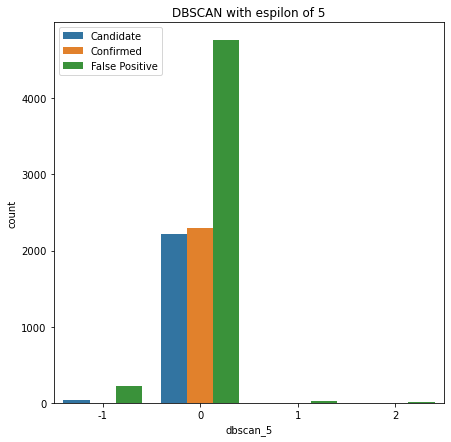

In [58]:
labels = ['Candidate', 'Confirmed', 'False Positive']

plt.figure(figsize=(7,7))
sns.countplot(data=kepler_df, x='dbscan_5', hue='koi_disposition').set_title('DBSCAN with espilon of 5')
plt.legend(labels)
plt.show()

Our next plot will involve dimensionality reduction using PCA. The plot consists of a empsilon of 5 and a PCA of 2.

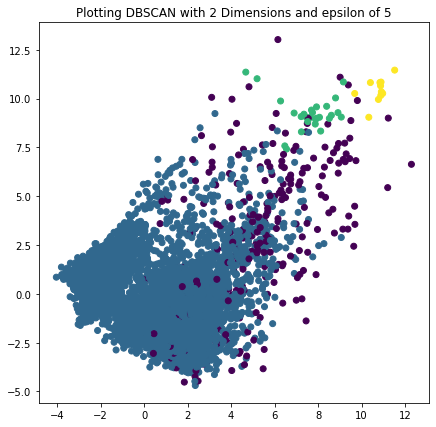

In [59]:
# Plot the solution.
plt.figure(figsize=(7,7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kepler_df.dbscan_5)
plt.title('Plotting DBSCAN with 2 Dimensions and epsilon of 5')

plt.show()

As observed in the PCA plot above, we cannot see any significant difference from the previous plot before the creation of the model. The shapes still seems to be similar with a slight change in color for some clusters. We will try other models and try to re-plot them again and see if there will be any significant change.

We will also be using UMAP as another method to visualize the data. To keep it standard, we will also be using a UMAP with 2 dimensions.

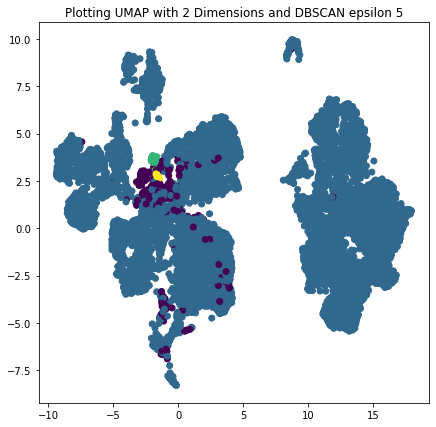

In [60]:
umap_results_2 = umap.UMAP(n_components=2, min_dist=.5, random_state=100).fit_transform(x_scaled)

plt.figure(figsize=(7,7))
plt.scatter(umap_results_2[:,0],umap_results_2[:,1], c=kepler_df.dbscan_5)
plt.title('Plotting UMAP with 2 Dimensions and DBSCAN epsilon 5')
plt.show()

Though the plot aboove shape change and that it has begun to cluster, the colors are slightly different as well.

Lastly, we will get the silhouette metric of the model.

In [61]:
print('The Silhouette score for DBSCAN with an epsilon of 5 is: {}'
      .format(metrics.silhouette_score(x_scaled, dbscan_5, metric='euclidean')))

The Silhouette score for DBSCAN with an epsilon of 5 us: 0.440453233006097


#### DBSCAN 7

We will try the same model once more but this time increase the epsilon to 7 and also increase the min samples to 20 and observe what happens next.

In [62]:
dbscan_7 = DBSCAN(eps=7, min_samples=20).fit_predict(x_scaled)

In [63]:
kepler_df['dbscan_7'] = dbscan_7

In [64]:
kepler_df.dbscan_7.value_counts()  

 0    9522
-1      41
Name: dbscan_7, dtype: int64

Our first plot is also creating a boxplot tro visualize the specific values and how they were clustered together.

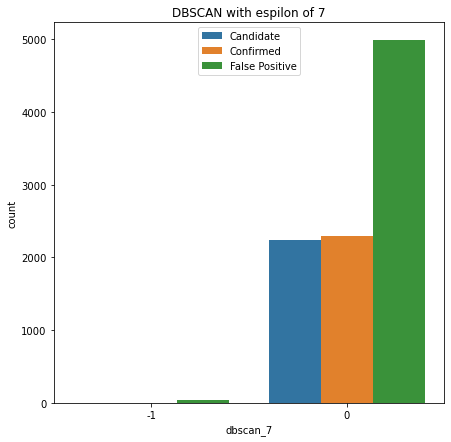

In [65]:
labels = ['Candidate', 'Confirmed', 'False Positive']

plt.figure(figsize=(7,7))
sns.countplot(data=kepler_df, x='dbscan_7', hue='koi_disposition').set_title('DBSCAN with espilon of 7')
plt.legend(labels)
plt.show()

The following plot will apply PCA with 2 dimensions. Repeating the method earlier to apply dimensionality reduction to visualize the plot.

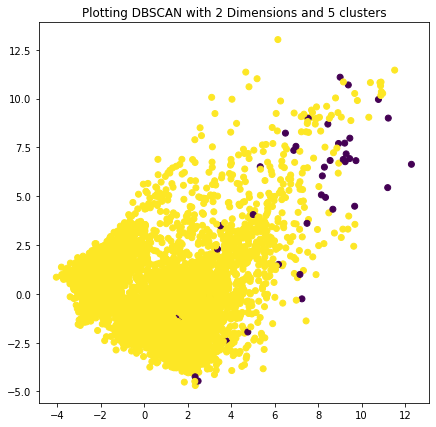

In [66]:
# Plot the solution.
plt.figure(figsize=(7,7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kepler_df.dbscan_7)
plt.title('Plotting DBSCAN with 2 Dimensions and 5 clusters')
plt.show()

The plot above still shows a similar plot as when we first applied dimensionality reduction using PCA. The colors are slighly different with yellow being the majority of it, but there still is no clear cluster. We will proceed forward and plot it with our second method, UMAP.

The second method of dimensionality reduction is to apply the UMAP with 2 dimensions.

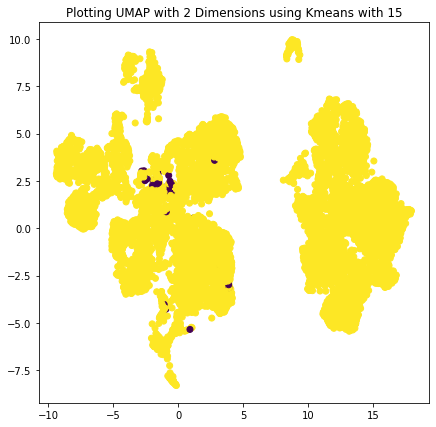

In [67]:
umap_results_2 = umap.UMAP(n_components=2, min_dist=.5, random_state=100).fit_transform(x_scaled)

plt.figure(figsize=(7,7))
plt.scatter(umap_results_2[:,0],umap_results_2[:,1], c=kepler_df.dbscan_7)
plt.title('Plotting UMAP with 2 Dimensions using Kmeans with 15')
plt.show()

Though we see some parts clustering together better than PCA, there seems to be some forming. Mostly the same colors except on some parts.

We will now get the silhouette score metric for this model.

In [68]:
print('The Silhouette score for DBSCAN with an epsilon of 7 is : {}'
      .format(metrics.silhouette_score(x_scaled, dbscan_7, metric='euclidean')))

The Silhouette score for DBSCAN with an epsilon of 7 is : 0.5324552788469618


#### Hierarchical Clustering with 5 clusters

Our next model is to create a heirarichal clustering model in which we will be using 2 linkage method. The first method we will be using the the 'ward' method with 5 clusters

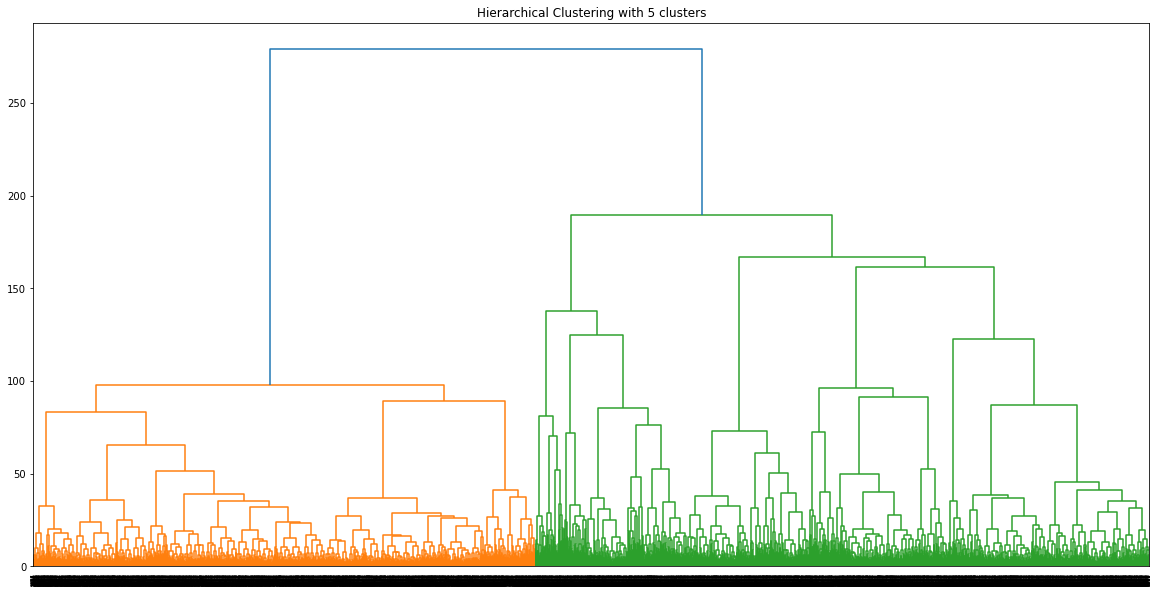

In [69]:
# Defining the agglomerative clustering
agg_cluster_ward = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=5).fit_predict(x_scaled)

plt.figure(figsize=(20,10))
dendrogram(linkage(x_scaled, method='ward'))
plt.title('Hierarchical Clustering with 5 clusters')
plt.show()

Obtaining the metrics by retreiving the Solhouette Score for model with 5 clusters

In [70]:
print('The Silhouette score for Heirerichal clustering with 5 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, agg_cluster_ward, metric='euclidean')))

The Silhouette score for Heirerichal clustering using the ward method is: 0.19148573154912182


#### Hierarchical Clustering with 15 clusters

We will repeat the same method used previously, but using 15 clusters this time.

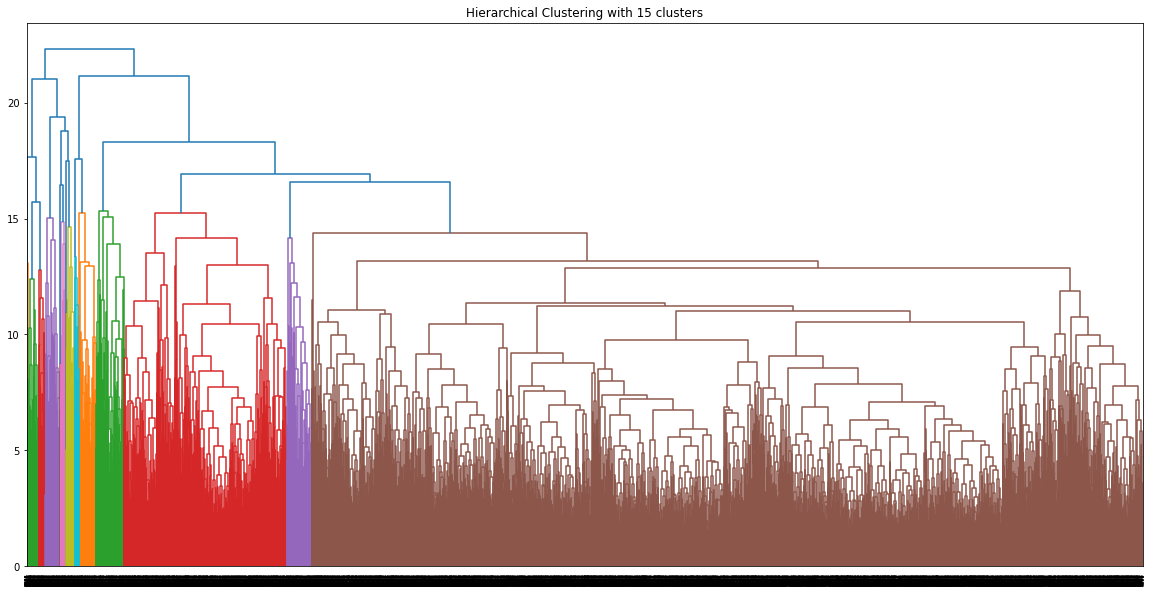

In [71]:
# Defining the agglomerative clustering
agg_cluster_complete = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=15).fit_predict(x_scaled)

plt.figure(figsize=(20,10))
dendrogram(linkage(x_scaled, method='complete'))
plt.title('Hierarchical Clustering with 15 clusters')
plt.show()

Obtaining the metrics by retreiving the Solhouette Score for model with 15 clusters

In [72]:
print('The Silhouette score for Heirerichal clustering with 15 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, agg_cluster_complete, metric='euclidean')))

The Silhouette score for Heirerichal clustering with 15 clusters is: 0.16562091494683256


#### Gaussian Mixture Models with 5 Clusters

The last model we will use will be the Gaussian Mixture Model or GMM. As previously stated, we will begin the first one by using 5 n_componments or clusters.

In [73]:
gmm_5 = GaussianMixture(n_components=5).fit_predict(x_scaled)

In [74]:
kepler_df['gmm_clusters_5'] = gmm_5

In [85]:
kepler_df.gmm_clusters_5.value_counts()  

0    3238
2    2597
4    2013
1    1031
3     684
Name: gmm_clusters_5, dtype: int64

We plot the first model with 5 clusters using the PCA method with 2 dimensions.

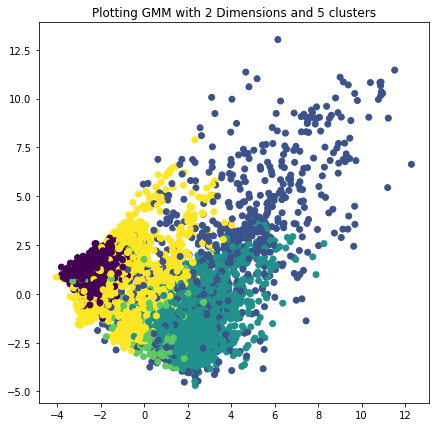

In [75]:
# Plot the solution.
plt.figure(figsize=(7,7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kepler_df.gmm_clusters_5)
plt.title('Plotting GMM with 2 Dimensions and 5 clusters')
plt.show()

We now proceed to our second method to plot the model with UMAP by using 2 n_componments. The GMM model is still using the 5 clusters specified earlier.

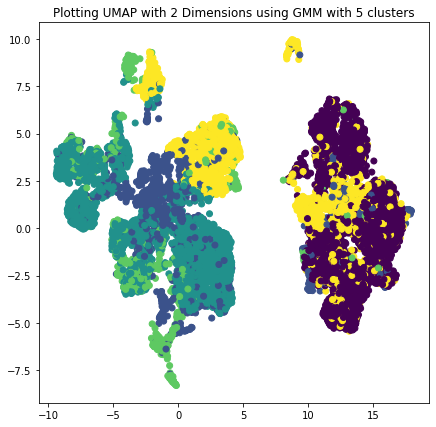

In [76]:
umap_results_2 = umap.UMAP(n_components=2, min_dist=.5, random_state=100).fit_transform(x_scaled)

plt.figure(figsize=(7,7))
plt.scatter(umap_results_2[:,0],umap_results_2[:,1], c=kepler_df.gmm_clusters_5)
plt.title('Plotting UMAP with 2 Dimensions using GMM with 5 clusters')
plt.show()

In [77]:
print('The GMM Silhouette score with 5 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, gmm_5, metric='euclidean')))

The GMM Silhouette score with 5 clusters is: 0.09354528092957273


#### Gaussian Mixture Models with 15 Clusters

Our final model will be a GMM with 15 clusters or n_components.

In [78]:
gmm_15 = GaussianMixture(n_components=15).fit_predict(x_scaled)

In [79]:
kepler_df['gmm_clusters_15'] = gmm_15

Plotting the GMM model with 5 clusters using the PCA method in order to reduce dimensionality.

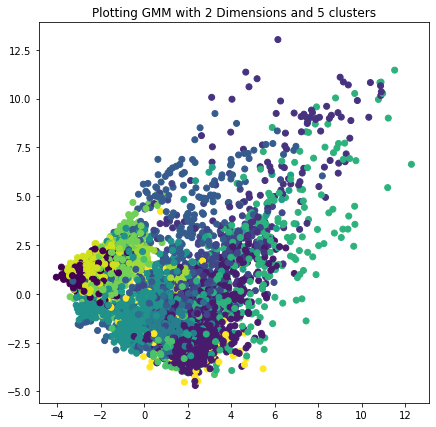

In [80]:
# Plot the solution.
plt.figure(figsize=(7,7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kepler_df.gmm_clusters_15)
plt.title('Plotting GMM with 2 Dimensions and 5 clusters')
plt.show()

Plotting with the second  GMM model with 15 clusters using the UMAP method in order to also reduce dimensionality.

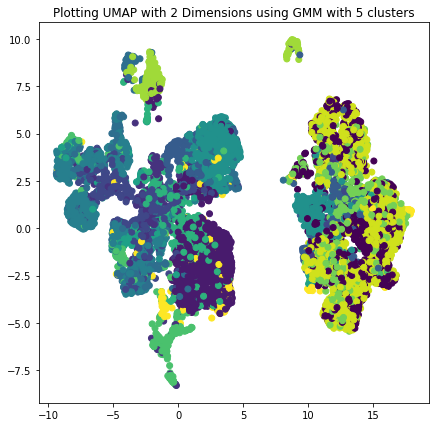

In [81]:
umap_results_2 = umap.UMAP(n_components=2, min_dist=.5, random_state=100).fit_transform(x_scaled)

plt.figure(figsize=(7,7))
plt.scatter(umap_results_2[:,0],umap_results_2[:,1], c=kepler_df.gmm_clusters_15)
plt.title('Plotting UMAP with 2 Dimensions using GMM with 5 clusters')
plt.show()

In [82]:
print('The GMM Silhouette score with 15 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, gmm_15, metric='euclidean')))

The GMM Silhouette score with 15 clusters is: 0.021810531819111568


In [83]:
print('The Silhouette score for KMeans of 5 is: {}'
      .format(metrics.silhouette_score(x_scaled, kmeans_clusters_5, metric='euclidean')))
print('The Silhouette score for KMEANS with 15 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, kmeans_clusters_15, metric='euclidean')))
print()
print('The Silhouette score for DBSCAN with an epsilon of 5 is: {}'
      .format(metrics.silhouette_score(x_scaled, dbscan_5, metric='euclidean')))
print('The Silhouette score for DBSCAN with an epsilon of 7 is : {}'
      .format(metrics.silhouette_score(x_scaled, dbscan_7, metric='euclidean')))
print()
print('The Silhouette score for Heirerichal clustering with 5 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, agg_cluster_ward, metric='euclidean')))
print('The Silhouette score for Heirerichal clustering with 15 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, agg_cluster_complete, metric='euclidean')))      
print()
print('The GMM Silhouette score with 5 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, gmm_5, metric='euclidean')))
print('The GMM Silhouette score with 15 clusters is: {}'
      .format(metrics.silhouette_score(x_scaled, gmm_15, metric='euclidean')))

The Silhouette score for KMeans of 5 is: 0.21126864698555156
The Silhouette score for KMEANS with 15 clusters is: 0.12859434534628264

The Silhouette score for DBSCAN with an epsilon of 5 is: 0.440453233006097
The Silhouette score for DBSCAN with an epsilon of 7 is : 0.5324552788469618

The Silhouette score for Heirerichal clustering with 5 clusters is: 0.19148573154912182
The Silhouette score for Heirerichal clustering with 15 clusters is: 0.16562091494683256

The GMM Silhouette score with 5 clusters is: 0.09354528092957273
The GMM Silhouette score with 15 clusters is: 0.021810531819111568


## <font color='#6605a2'>Summary</font> 

## <font color='#6605a2'>Future Considerations</font> 